<a href="https://colab.research.google.com/github/yelxel/project-2-f1-data/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

1) Source of data

- http://ergast.com/mrd/ provides comprehensive access to motor racing data

2) Brief description of data

- "The dataset consists of all information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from 1950 till the latest 2021 season." [Source](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=constructors.csv)

3) What is the target?

- y = positionOrder, which represents a driver's final ranking in the race

4) Is this a classification or regression problem?

- Classification

5) How many features?

- 15 features

6) How many rows of data.

- 25660 rows

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

There may be some challenges in finding and addressing missing data, especially as this is a relatively large data set.

Data Preprocessing

In [65]:
# import
races = pd.read_csv('/content/drive/My Drive/CodingDojo Data Science/05 Project/races.csv')
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/2009,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/2009,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/2009,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,26/04/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,10/05/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [66]:
# import
drivers = pd.read_csv('/content/drive/My Drive/CodingDojo Data Science/05 Project/drivers.csv')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [67]:
# import
constructors = pd.read_csv('/content/drive/My Drive/CodingDojo Data Science/05 Project/constructors.csv')
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [68]:
# import
results = pd.read_csv('/content/drive/My Drive/CodingDojo Data Science/05 Project/results.csv')
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [69]:
# merge datasets
df = pd.merge(results, races[['raceId', 'year','name', 'round']],on = 'raceId', how = 'left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [70]:
# drop columns
df.drop(['number', 'position', 'positionText','laps','fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId', 'time', 'fastestLapTime'], axis = 1, inplace=True)
df.head()

,grid,positionOrder,points,milliseconds,rank,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,5690616,2,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,5696094,3,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,5698779,5,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,5707797,7,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,5708630,1,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [71]:
# rename columns
df.rename(columns={'rank':'fastestLapRank', 'name_x':'grandPrix', 'nationality_x':'driverNationality','name_y':'constructorName','nationality_y':'constructorNationality','driverRef':'driver'}, inplace=True)
df.head()

,grid,positionOrder,points,milliseconds,fastestLapRank,fastestLapSpeed,year,grandPrix,round,driver,driverNationality,constructorName,constructorNationality
0,1,1,10.0,5690616,2,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,5696094,3,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,5698779,5,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,5707797,7,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,5708630,1,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [72]:
#rearrange columns
df = df[['year', 'grandPrix', 'round', 'driver', 'constructorName', 'grid', 'positionOrder','points','milliseconds','fastestLapRank', 'fastestLapSpeed', 'driverNationality','constructorNationality']]
df.head()

,year,grandPrix,round,driver,constructorName,grid,positionOrder,points,milliseconds,fastestLapRank,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,5690616,2,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,5696094,3,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,5698779,5,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,5707797,7,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,5708630,1,218.385,Finnish,British


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25660 non-null  int64  
 1   grandPrix               25660 non-null  object 
 2   round                   25660 non-null  int64  
 3   driver                  25660 non-null  object 
 4   constructorName         25660 non-null  object 
 5   grid                    25660 non-null  int64  
 6   positionOrder           25660 non-null  int64  
 7   points                  25660 non-null  float64
 8   milliseconds            25660 non-null  object 
 9   fastestLapRank          25660 non-null  object 
 10  fastestLapSpeed         25660 non-null  object 
 11  driverNationality       25660 non-null  object 
 12  constructorNationality  25660 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 2.7+ MB


In [74]:
# check for duplicated rows
df.duplicated().sum()

0

In [75]:
# check for missing values
df.isna().sum()

year                      0
grandPrix                 0
round                     0
driver                    0
constructorName           0
grid                      0
positionOrder             0
points                    0
milliseconds              0
fastestLapRank            0
fastestLapSpeed           0
driverNationality         0
constructorNationality    0
dtype: int64

In [76]:
# sort values
df = df.sort_values(by=['year','round','positionOrder'], ascending = [False, True, True])

In [77]:
# replace \N values in time column due to missing data when drivers drop out of a race
df.milliseconds.replace('\\N', np.nan, inplace=True)
df.fastestLapRank.replace('\\N', np.nan, inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace=True)

In [78]:
# change datatypes
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [79]:
df.head()

,year,grandPrix,round,driver,constructorName,grid,positionOrder,points,milliseconds,fastestLapRank,fastestLapSpeed,driverNationality,constructorNationality
25400,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,5853584.0,1.0,206.018,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,5859182.0,3.0,203.501,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,5863259.0,5.0,202.469,British,German
25403,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,5864795.0,6.0,202.313,British,German
25404,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,5868338.0,8.0,201.641,Danish,American


In [80]:
# reset
df.reset_index(drop=True, inplace=True)

In [81]:
df.shape

(25660, 13)

In [82]:
df.head()

,year,grandPrix,round,driver,constructorName,grid,positionOrder,points,milliseconds,fastestLapRank,fastestLapSpeed,driverNationality,constructorNationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,5853584.0,1.0,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,5859182.0,3.0,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,5863259.0,5.0,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,5864795.0,6.0,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,5868338.0,8.0,201.641,Danish,American


In [83]:
# check for inconsistencies in data
df['year'].value_counts()

1989    620
1990    542
1991    539
1988    495
2012    480
       ... 
1951    179
1969    177
1957    171
1966    166
1950    160
Name: year, Length: 73, dtype: int64

In [84]:
# check for inconsistencies in data for categorical values
df['grandPrix'].value_counts()

British Grand Prix               1833
Italian Grand Prix               1804
Monaco Grand Prix                1624
German Grand Prix                1599
Belgian Grand Prix               1537
French Grand Prix                1484
Canadian Grand Prix              1251
Spanish Grand Prix               1236
Brazilian Grand Prix             1143
United States Grand Prix          989
Hungarian Grand Prix              871
Australian Grand Prix             850
Austrian Grand Prix               841
Japanese Grand Prix               822
Dutch Grand Prix                  707
San Marino Grand Prix             667
South African Grand Prix          581
European Grand Prix               528
Mexican Grand Prix                478
Portuguese Grand Prix             453
Argentine Grand Prix              448
Malaysian Grand Prix              412
Indianapolis 500                  405
Bahrain Grand Prix                380
Chinese Grand Prix                342
Abu Dhabi Grand Prix              276
Singapore Gr

In [85]:
# check for inconsistencies in data
df['round'].value_counts()

2     1800
6     1771
7     1769
5     1762
3     1754
8     1701
1     1698
4     1696
9     1585
10    1495
11    1385
12    1315
13    1262
14    1215
15    1140
16    1001
17     511
18     316
19     256
20     126
21      82
22      20
Name: round, dtype: int64

In [86]:
# check for inconsistencies in data for categorical values
df['driver'].value_counts()

raikkonen             352
alonso                349
barrichello           326
button                309
michael_schumacher    308
                     ... 
kavanagh                1
kessler                 1
ecclestone              1
taramazzo               1
biondetti               1
Name: driver, Length: 854, dtype: int64

In [87]:
# check for inconsistencies in data for categorical values
df['constructorName'].value_counts()

Ferrari           2329
McLaren           1813
Williams          1567
Tyrrell            881
Team Lotus         871
                  ... 
Cooper-OSCA          1
Tec-Mec              1
Bugatti              1
Arzani-Volpini       1
Milano               1
Name: constructorName, Length: 210, dtype: int64

In [88]:
# identify outliers
df.describe()


,year,round,grid,positionOrder,points,milliseconds,fastestLapRank,fastestLapSpeed
count,25660.000000,25660.000000,25660.000000,25660.000000,25660.000000,6.963000e+03,7411.000000,7206.000000
mean,1990.029072,8.318550,11.187256,12.892673,1.854523,6.225696e+06,10.426258,203.083332
std,19.229104,4.904752,7.251983,7.721729,4.131527,1.673671e+06,6.169824,21.332629
min,1950.000000,1.000000,0.000000,1.000000,0.000000,2.070710e+05,0.000000,89.540000
25%,1976.000000,4.000000,5.000000,6.000000,0.000000,5.415903e+06,5.000000,192.762250
50%,1990.000000,8.000000,11.000000,12.000000,0.000000,5.808632e+06,10.000000,204.291000
75%,2007.000000,12.000000,17.000000,18.000000,2.000000,6.426908e+06,16.000000,216.197750
max,2022.000000,22.000000,34.000000,39.000000,50.000000,1.509054e+07,24.000000,257.320000


Data Visualization

In [89]:
driverWinner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

In [90]:
top10Drivers = driverWinner.head(10)
print(top10Drivers)

               driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4               senna             41
5              alonso             32
6             mansell             31
7      max_verstappen             28
8             stewart             27
9               lauda             25


Text(0.5, 0, 'Number of GP wins')

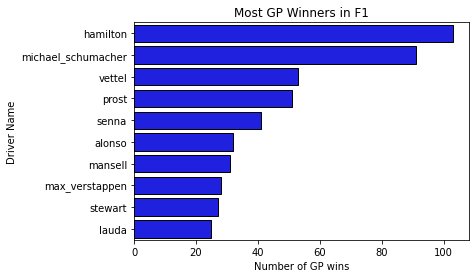

In [91]:
# top 10 drivers viz
import seaborn as sns
sns.barplot(data=top10Drivers, y='driver', x='positionOrder', color='blue', edgecolor='black')
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

In [92]:
# top 10 constructors
constructorWinner = df.loc[df['positionOrder'] == 1].groupby('constructorName')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()
top10Constructors = constructorWinner.head(10)
print(top10Constructors)

  constructorName  positionOrder
0         Ferrari            243
1         McLaren            179
2        Mercedes            124
3        Williams            114
4        Red Bull             84
5      Team Lotus             45
6         Renault             35
7        Benetton             27
8         Brabham             23
9         Tyrrell             23


Text(0.5, 0, 'Number of GP wins')

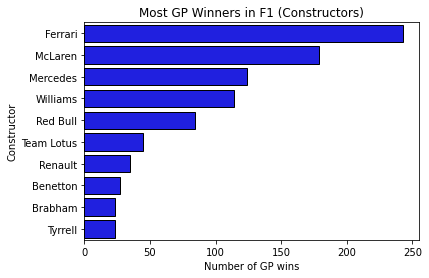

In [93]:
# top 10 constructors viz
import seaborn as sns
sns.barplot(data=top10Constructors, y='constructorName', x='positionOrder', color='blue', edgecolor='black')
plt.title('Most GP Winners in F1 (Constructors)')
plt.ylabel('Constructor')
plt.xlabel('Number of GP wins')

In [94]:
corr = df.corr()


There is a moderate negative correlation of .57 between the points and final positionOrder of a driver in each race.


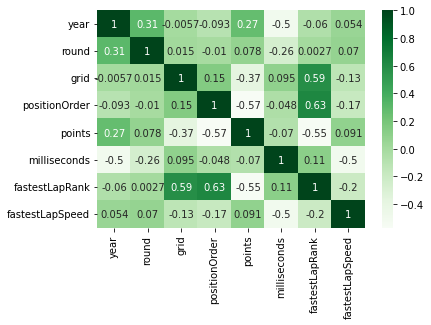

In [95]:
sns.heatmap(corr, cmap = 'Greens', annot = True)
print('There is a moderate negative correlation of .57 between the points and final positionOrder of a driver in each race.')

Implement Pre-processing Pipeline

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25660 non-null  int64  
 1   grandPrix               25660 non-null  object 
 2   round                   25660 non-null  int64  
 3   driver                  25660 non-null  object 
 4   constructorName         25660 non-null  object 
 5   grid                    25660 non-null  int64  
 6   positionOrder           25660 non-null  int64  
 7   points                  25660 non-null  float64
 8   milliseconds            6963 non-null   float64
 9   fastestLapRank          7411 non-null   float64
 10  fastestLapSpeed         7206 non-null   float64
 11  driverNationality       25660 non-null  object 
 12  constructorNationality  25660 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 2.5+ MB


In [97]:
# Split
from sklearn.model_selection import train_test_split
X = df.drop('positionOrder', axis=1)
y = df['positionOrder']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [98]:
# Imputers
from sklearn.impute import SimpleImputer
freq_imputer = SimpleImputer(strategy='most_frequent')

In [99]:
# Instantiate scaler into pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

numeric_pipe = make_pipeline(freq_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [100]:
# Instantiate ohe
ohe = OneHotEncoder(handle_unknown='ignore')
nominal_pipe = make_pipeline(ohe)

In [101]:
# Instantiate column selectors
from sklearn.compose import make_column_transformer, make_column_selector
nominal_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [102]:
# tuples
number_tuple = (numeric_pipe, num_selector)
nominal_tuple = (nominal_pipe, nominal_selector)
# Column Transformer
preprocessor = make_column_transformer(number_tuple, nominal_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fead1cf0190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fead1cf0d50>)])

In [103]:
  # fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fead1cf0190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fead1cf0d50>)])

In [104]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [105]:
# Check for missing values and that data is scaled and one-hot encoded
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed



All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (19245, 1123)




<19245x1123 sparse matrix of type '<class 'numpy.float64'>'
	with 230940 stored elements in Compressed Sparse Row format>

Model Development

In [106]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_processed,y_train)

LinearRegression()

In [107]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.6382784167162292
0.569025317044803


In [108]:
# Decision Tree Refressor
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [109]:
# evaluate the model
train_score2 = dec_tree.score(X_train_processed, y_train)
test_score2 = dec_tree.score(X_test_processed, y_test)
print(train_score2)
print(test_score2)

1.0
0.5382087031622416


In [110]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [111]:
# What was the depth of our default tree?
dec_tree.get_depth()

101

In [112]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 40)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)


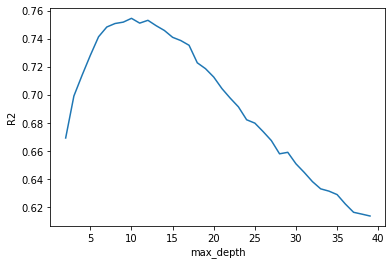

In [113]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');



In [114]:
# Let's run the model with our optimized value for max_depth
dec_tree_10 = DecisionTreeRegressor(max_depth = 10, random_state = 42)
dec_tree_10.fit(X_train_processed, y_train)
train_10_score = dec_tree_10.score(X_train_processed, y_train)
test_10_score = dec_tree_10.score(X_test_processed, y_test)
print(train_10_score)
print(test_10_score)


0.7695318042408544
0.75443953732484


In [115]:
# Bagged Trees
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(random_state = 42)
bagreg.fit(X_train_processed, y_train)


BaggingRegressor(random_state=42)

In [116]:
# evaluate
bagreg_train_score = bagreg.score(X_train_processed, y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)



0.9528110549324872
0.7273520154638888


In [117]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [118]:
# Evaluate
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9648220942246232
0.7516455384705422


In [119]:
# Try 200 trees
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Fit the model
rf_200.fit(X_train_processed, y_train)
# Obtain the scores
rf_200_train_score = rf_200.score(X_train_processed, y_train)
rf_200_test_score = rf_200.score(X_test_processed, y_test)
print(rf_200_train_score)
print(rf_200_test_score)


0.9655277599438418
0.7527876137689584


In [121]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 40)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    rf_new = RandomForestRegressor(max_depth = depth, 
                             random_state = 42)
    rf_new.fit(X_train_processed, y_train)
    score = rf_new.score(X_test_processed, y_test)
    r2.append(score)

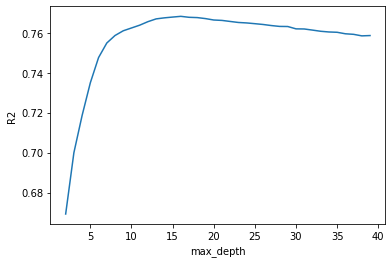

In [122]:
# Visualize which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [127]:
rf_10 = RandomForestRegressor(max_depth = 15, n_estimators = 200, random_state = 42)
rf_10.fit(X_train_processed, y_train)
train_rf_10_score = rf_10.score(X_train_processed, y_train)
test_rf_10_score = rf_10.score(X_test_processed, y_test)
print(train_rf_10_score)
print(test_rf_10_score)

0.8082574218617169
0.7684578844848107


I have decided to use the Random Forest Regressor model since it yields the highest testing score out of the other models (0.7684578844848107)